In [2]:
import matplotlib.pyplot as plt
%pylab inline 
%matplotlib inline

# %matplotlib notebook
import cv2 
import cvutils


Populating the interactive namespace from numpy and matplotlib


In [36]:
# imagePath = 'mona.jpg'
# imagePath = 'beatles.png'
imagePath = 'group1.jpg'
cascPath = "haarcascade_frontalface_default.xml"

In [37]:
# Create the haar cascade
faceCascade = cv2.CascadeClassifier(cascPath)

In [51]:
# Read the image
image = cv2.imread(imagePath)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [52]:
# cvutils.imshow("Original", image)
# cvutils.imshow("Greyscale", gray)

In [53]:
# Detect faces in the image
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=2,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE # cv2.CV_HAAR_SCALE_IMAGE
)

In [54]:
print("Found {0} faces!".format(len(faces)))


Found 41 faces!


In [55]:
# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)


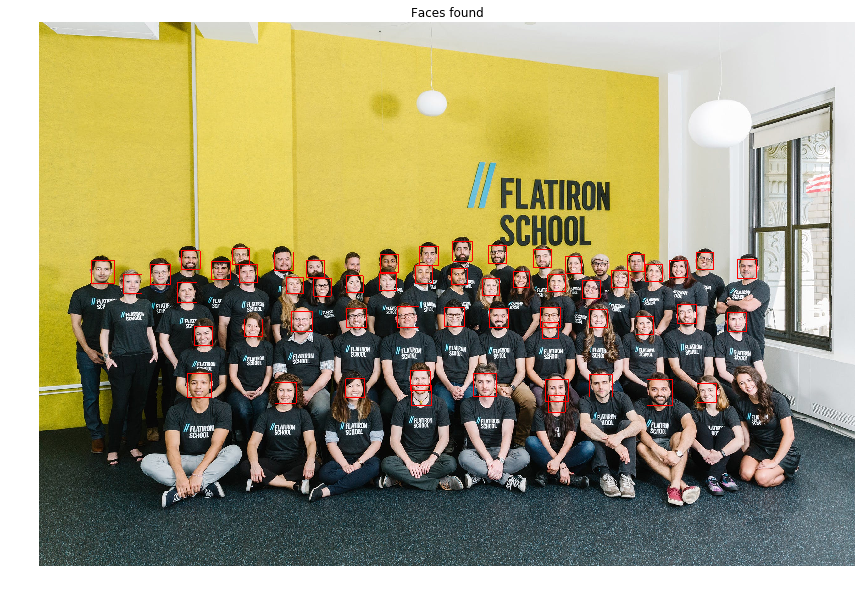

In [49]:
matplotlib.rcParams['figure.figsize'] = [20,10]
cvutils.imshow("Faces found", image)

AttributeError: 'function' object has no attribute 'clear_output'

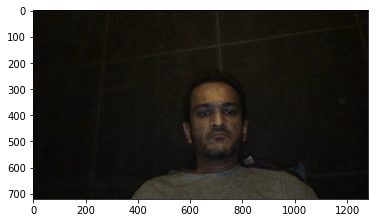

In [3]:
vc = cv2.VideoCapture(0)

if vc.isOpened(): # try to get the first frame
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    webcam_preview = plt.imshow(frame)    
else:
    is_capturing = False

while is_capturing:
    try:    # Lookout for a keyboardInterrupt to stop the script
        is_capturing, frame = vc.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
        webcam_preview.set_data(frame)
        plt.draw()

        display.clear_output(wait=True)
        display.display(plt.gcf())

        plt.pause(0.1)    # the pause time is = 1 / framerate
    except KeyboardInterrupt:
        vc.release()

In [57]:
import cv2
import sys

cascPath = sys.argv[1]
faceCascade = cv2.CascadeClassifier(cascPath)

video_capture = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()

error: OpenCV(3.4.2) /Users/travis/build/skvark/opencv-python/opencv/modules/objdetect/src/cascadedetect.cpp:1698: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'
